In [7]:
# create histograms of the distributions of the MSE's (1 frame ahead predictions)
# put the mse_frame2*.csv files in ./kitti_results_50hz
 

In [8]:
%matplotlib inline

# load in packages

import os
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [9]:
# set up parameters
# currently set up for the 50 hz files

data_dir ='./kitti_results_50hz/'
prefix = 'mse_frame2_P20_'
parts = 20
num_clips_per_avi = 20
num_pred_frames_per_clip = 9 # remember, no prediction for first frame 


In [10]:
# read in MSE results
# mse_frame, mse's by clip and fa

for part in range(1,parts+1):
    curr_mse_frame = data_dir+prefix+str(part)+'.csv'
    mse_in = pd.read_csv(curr_mse_frame,header = None)
#    print mse_in.shape
    if (part == 1):
        mse_frame = mse_in
    else:
        mse_frame = pd.concat([mse_frame,mse_in],axis=0)

mse_clip = np.apply_over_axes(np.mean, mse_frame, [1])

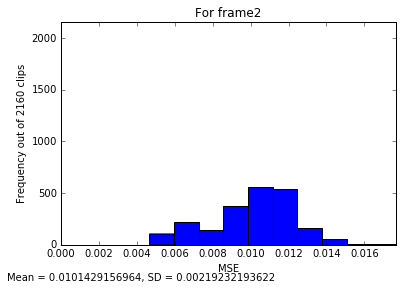

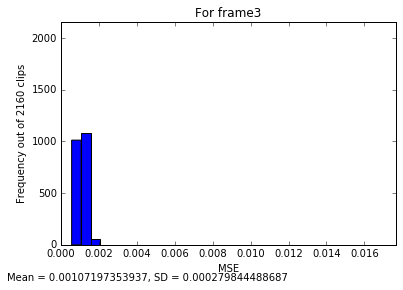

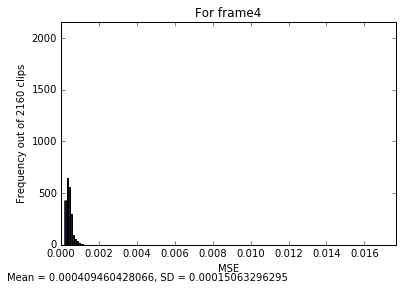

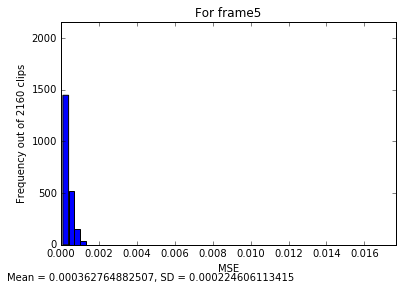

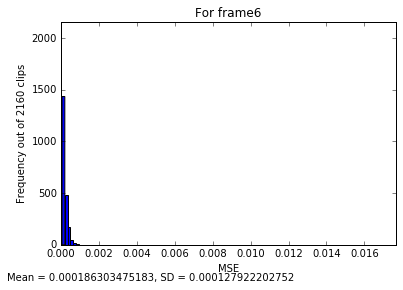

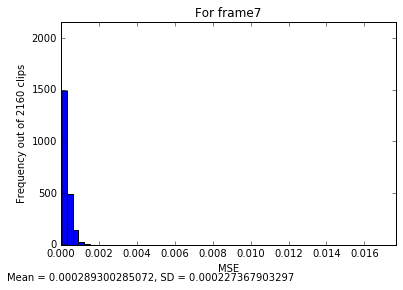

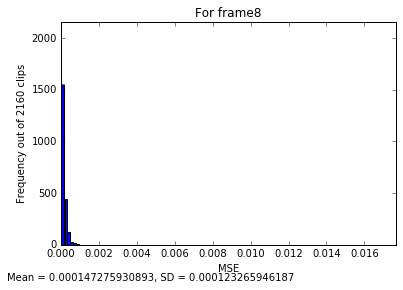

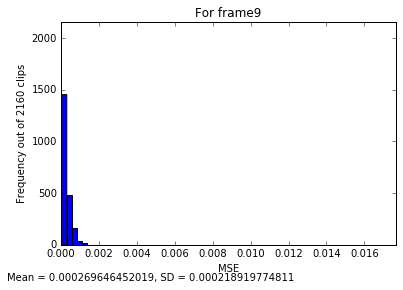

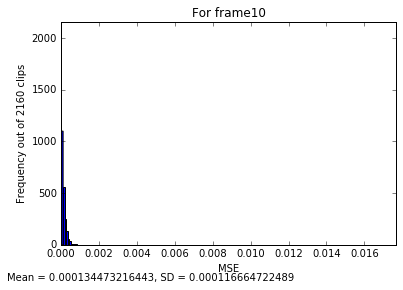

In [11]:
# plots of MSE's by frame (and by clip)

do_scale = 1 # parameter to decide whether all the histograms will have the same scale or not
do_png = 0 # toggle to write png files

if (do_scale):
    xmax = np.max(np.max(mse_frame))
    ymax, tmp = mse_frame.shape

for frame in range(0,num_pred_frames_per_clip):
    frame_plot = plt.hist(mse_frame[:][frame])
    if (do_scale):
        head = 'MSEsc'
        plt.axis([0,xmax,0,ymax])
    else:
        head = 'MSE'
    plt.xlabel('MSE')
    plt.ylabel('Frequency out of 2160 clips')
    tit_str = 'For ' + 'frame'+ str(frame + 2) 
    plt.title(tit_str)
    pmean = np.mean(mse_frame[:][frame])
    psd = np.std(mse_frame[:][frame])
    cap_str = 'Mean = '+str(pmean)+', SD = '+str(psd)
    plt.figtext(0.0,0.0,cap_str)
    plt.show()
    if (do_png):
        figfile = head+str(frame + 2)+'.png'
        plt.savefig(figfile)
    plt.close()
 

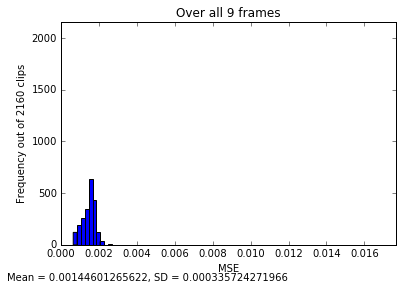

In [12]:
# plots of MSE's, over all frames (by clip)

do_scale = 1 # parameter to decide whether all the histograms will have the same scale or not
do_png = 0 # toggle to write png filesoverall = plt.hist(mse_clip)

overall = plt.hist(mse_clip)

if (do_scale):
    xmax = np.max(np.max(mse_frame))
    ymax, tmp = mse_frame.shape
    plt.axis([0,xmax,0,ymax])
    overall_file = 'MSEsc_overall.png'
else:
    overall_file = 'MSE_overall.png'
    
plt.xlabel('MSE')
plt.ylabel('Frequency out of 2160 clips')
plt.title('Over all 9 frames')
pmean = np.mean(mse_clip)
psd = np.std(mse_clip)
cap_str = 'Mean = '+str(pmean)+', SD = '+str(psd)
plt.figtext(0.0,0.0,cap_str)
plt.show()
if (do_png):
    plt.savefig(overall_file)
plt.close()    
